##**To Explore Unsupervised Machine Learning**
######**ABHISHEK BODAPATI**
###From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
###Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing


##**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##**Reading the dataset**

In [33]:
url = "https://raw.githubusercontent.com/abhishek-bodapati/TSF_Data_Science_Internship_Tasks/master/To%20Explore%20Unsupervised%20Machine%20Learning/Iris.csv"
data = pd.read_csv(url)
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


##**Finding the optimum number of clusters for k-means classification**

In [34]:
from sklearn.cluster import KMeans

In [35]:
X = data.iloc[:, 1:5].values 

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init='k-means++', n_init=10, max_iter=300, tol=0.0001)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

##**Plotting the elbow function**

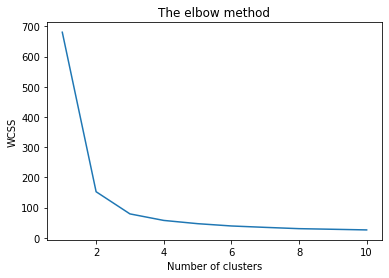

In [36]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#####From the elbow function WCSS doesn't gradually decrease from 3

In [37]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = None)
Y_kmeans = kmeans.fit_predict(X)

##**Visualizing the Clusters**

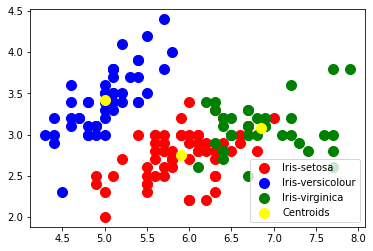

In [38]:
# Visualising the clusters - On the first two columns
plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()